In [19]:
import pandas as pd
import numpy as np
import os

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

# Load data

In [29]:
current_path = os.path.join(os.getcwd(), '..')
process_data_path = os.path.join(
    current_path, 'data/processed'
)

X_base = pd.read_csv(f'{process_data_path}/train_X.csv', sep=';', header=None)

# remove dir
X_train = X_base.iloc[:, 1:]
Y_train = pd.read_csv(f'{process_data_path}/train_Y.csv', sep=';', header=None)


val_X_base = pd.read_csv(f'{process_data_path}/validation_X.csv', sep=';', header=None)
X_val = val_X_base.iloc[:, 1:]
Y_val = pd.read_csv(f'{process_data_path}/validation_Y.csv', sep=';', header=None)

In [15]:
X_train.head()

,1,2,3,4,5,6,7,8,9,10,...,2039,2040,2041,2042,2043,2044,2045,2046,2047,2048
0,0.020559,0.000000,0.028202,0.000000,0.000000,0.000000,0.000000,0.000000,0.848222,0.000000,...,0.041989,0.000000,0.001189,0.000000,0.000000,0.000000,0.000000,0.158686,0.022069,0.015453
1,0.005832,0.000000,0.000000,0.195793,0.135540,0.000000,0.000000,0.000000,0.037239,0.178107,...,0.000786,0.225048,0.007137,0.002709,0.417306,0.006508,0.232912,0.402081,0.012840,0.015124
2,0.153902,0.054953,0.000000,0.227710,0.000000,0.000000,0.055075,0.000000,0.212037,0.003703,...,0.000000,0.494641,0.158075,0.016747,0.042241,0.000000,0.297305,0.005471,0.000000,0.000000
3,0.132013,0.004820,0.042391,0.416459,0.000000,0.000000,0.064357,0.000174,0.406951,0.046289,...,0.039890,0.146739,0.037772,0.128572,0.000000,0.010863,0.282370,0.007928,0.101743,0.000000
4,0.317695,0.006122,0.049093,0.148959,0.017246,0.042266,0.039550,0.000000,0.052415,0.500694,...,0.013162,0.084296,0.000000,0.009203,0.346758,0.015272,0.260718,0.000427,0.000000,0.009156


In [14]:
X_train.shape

(2000, 2048)

# Define SVM model


In [22]:
model = GaussianNB(var_smoothing=1e-09)
model.fit(X_train, np.ravel(Y_train))

GaussianNB(priors=None, var_smoothing=1e-09)

In [31]:
X_val.head()

,1,2,3,4,5,6,7,8,9,10,...,2039,2040,2041,2042,2043,2044,2045,2046,2047,2048
0,0.113066,0.092932,0.049860,0.012539,0.143356,0.000000,0.070093,0.360593,0.146459,0.282044,...,0.124037,0.407056,0.023906,0.000000,0.313693,0.024208,0.207113,0.027708,0.031662,0.000000
1,0.000000,0.000000,0.000000,0.001948,0.000000,0.006094,0.067885,0.000000,0.007222,0.288055,...,0.000000,0.108179,0.000000,0.055721,0.416413,0.551411,0.020723,0.030216,0.011361,0.035135
2,0.069147,0.008250,0.020850,0.024048,0.107994,0.000000,0.000000,0.000000,0.000000,0.363297,...,0.118066,0.114740,0.000000,0.050931,0.000000,0.001744,0.003266,0.114523,0.032208,0.000000
3,0.002581,0.000000,0.000000,0.011160,0.003474,0.000000,0.246704,0.000000,0.067059,0.262001,...,0.000000,0.442876,0.000000,0.008169,0.081728,0.000000,0.101983,0.029655,0.000000,0.000000
4,0.004565,0.052577,0.003185,0.149290,0.023197,0.000000,0.020937,0.062055,0.046613,0.026664,...,0.000000,0.001382,0.006364,0.000000,0.438054,0.131151,0.032072,0.038585,0.000000,0.007839


Acurácia Naive Bayes Validação: 0.976


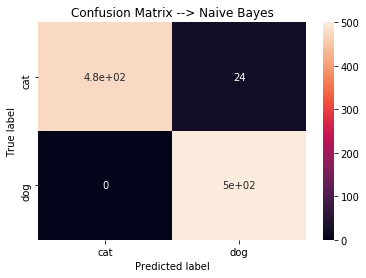

In [61]:
acc = model.score(X_val, Y_val)
print(f'Acurácia Naive Bayes Validação: {acc}')

all_classes = ['cat', 'dog']

predictions = model.predict(X_val)
cm = confusion_matrix(Y_val, predictions)
df_cm = pd.DataFrame(cm, index=[all_classes], columns=all_classes)
sns.heatmap(df_cm, annot=True)
plt.title(f'Confusion Matrix --> Naive Bayes')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


Confundiu cat: /Users/lucaspaim/PycharmProjects/deep_learning_cats_dogs/notebooks/../data/raw/cats_and_dogs_filtered/validation/cats/cat.2337.jpg com dog, proba: [0. 1.]


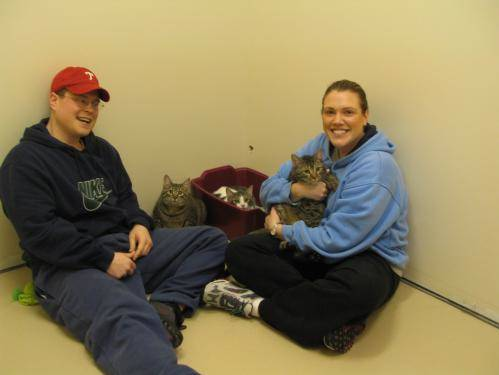

Confundiu cat: /Users/lucaspaim/PycharmProjects/deep_learning_cats_dogs/notebooks/../data/raw/cats_and_dogs_filtered/validation/cats/cat.2135.jpg com dog, proba: [6.04805723e-115 1.00000000e+000]


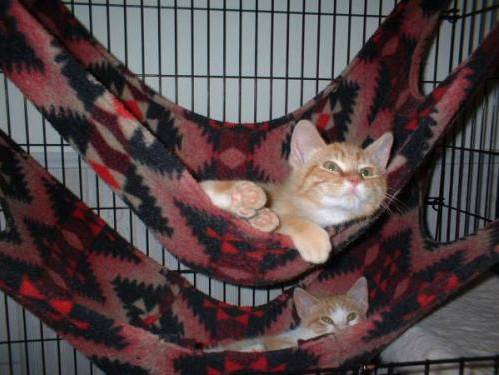

Confundiu cat: /Users/lucaspaim/PycharmProjects/deep_learning_cats_dogs/notebooks/../data/raw/cats_and_dogs_filtered/validation/cats/cat.2295.jpg com dog, proba: [0. 1.]


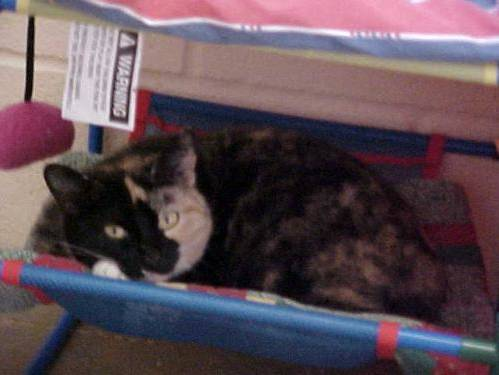

Confundiu cat: /Users/lucaspaim/PycharmProjects/deep_learning_cats_dogs/notebooks/../data/raw/cats_and_dogs_filtered/validation/cats/cat.2326.jpg com dog, proba: [1.74321548e-142 1.00000000e+000]


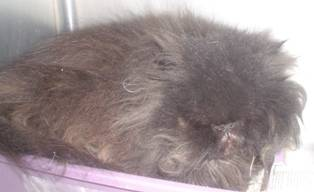

Confundiu cat: /Users/lucaspaim/PycharmProjects/deep_learning_cats_dogs/notebooks/../data/raw/cats_and_dogs_filtered/validation/cats/cat.2047.jpg com dog, proba: [0. 1.]


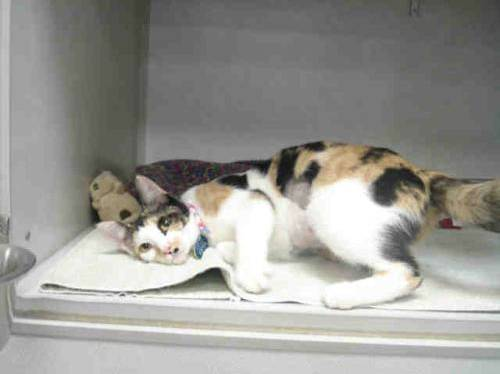

Confundiu cat: /Users/lucaspaim/PycharmProjects/deep_learning_cats_dogs/notebooks/../data/raw/cats_and_dogs_filtered/validation/cats/cat.2279.jpg com dog, proba: [0. 1.]


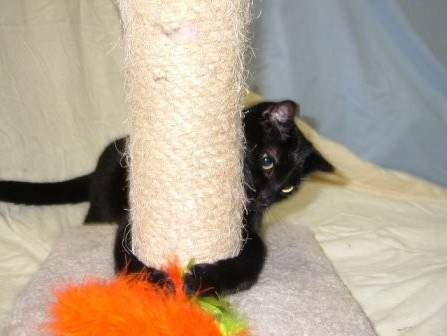

Confundiu cat: /Users/lucaspaim/PycharmProjects/deep_learning_cats_dogs/notebooks/../data/raw/cats_and_dogs_filtered/validation/cats/cat.2457.jpg com dog, proba: [0. 1.]


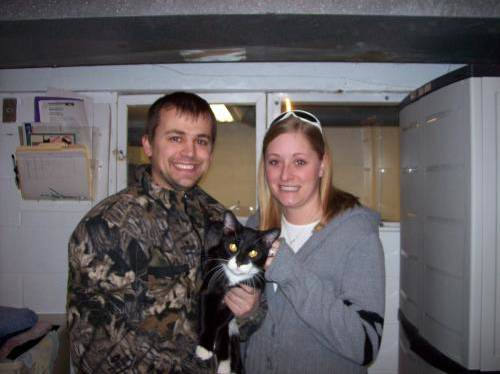

Confundiu cat: /Users/lucaspaim/PycharmProjects/deep_learning_cats_dogs/notebooks/../data/raw/cats_and_dogs_filtered/validation/cats/cat.2456.jpg com dog, proba: [1.98380278e-74 1.00000000e+00]


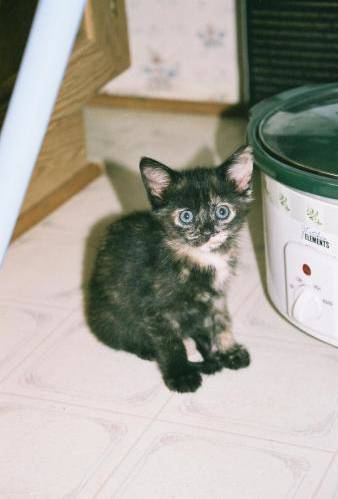

Confundiu cat: /Users/lucaspaim/PycharmProjects/deep_learning_cats_dogs/notebooks/../data/raw/cats_and_dogs_filtered/validation/cats/cat.2085.jpg com dog, proba: [0. 1.]


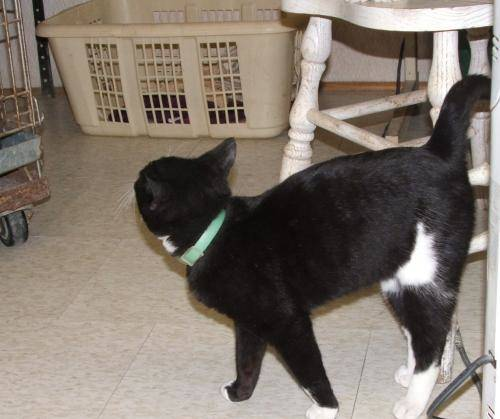

Confundiu cat: /Users/lucaspaim/PycharmProjects/deep_learning_cats_dogs/notebooks/../data/raw/cats_and_dogs_filtered/validation/cats/cat.2432.jpg com dog, proba: [4.29112626e-166 1.00000000e+000]


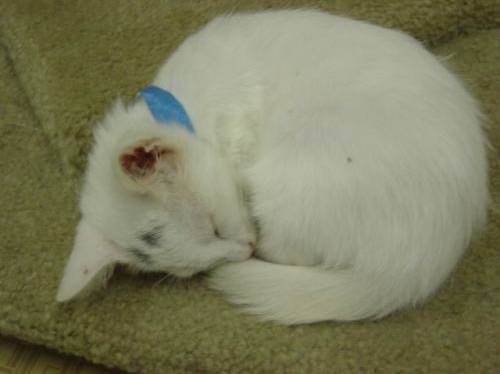

Confundiu cat: /Users/lucaspaim/PycharmProjects/deep_learning_cats_dogs/notebooks/../data/raw/cats_and_dogs_filtered/validation/cats/cat.2355.jpg com dog, proba: [0. 1.]


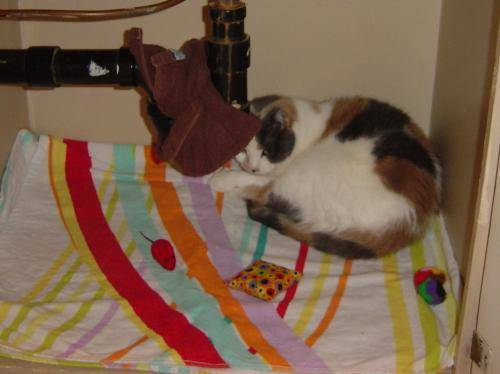

Confundiu cat: /Users/lucaspaim/PycharmProjects/deep_learning_cats_dogs/notebooks/../data/raw/cats_and_dogs_filtered/validation/cats/cat.2433.jpg com dog, proba: [0. 1.]


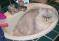

Confundiu cat: /Users/lucaspaim/PycharmProjects/deep_learning_cats_dogs/notebooks/../data/raw/cats_and_dogs_filtered/validation/cats/cat.2185.jpg com dog, proba: [0. 1.]


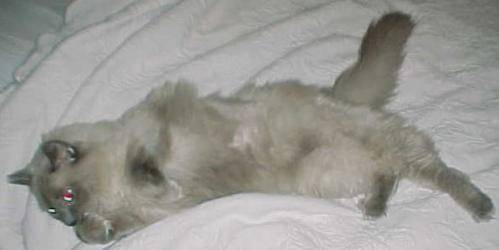

Confundiu cat: /Users/lucaspaim/PycharmProjects/deep_learning_cats_dogs/notebooks/../data/raw/cats_and_dogs_filtered/validation/cats/cat.2420.jpg com dog, proba: [3.73132555e-136 1.00000000e+000]


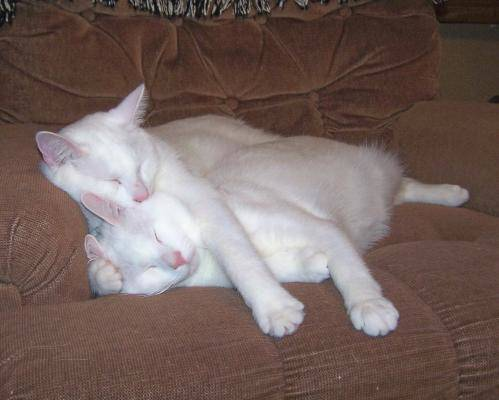

Confundiu cat: /Users/lucaspaim/PycharmProjects/deep_learning_cats_dogs/notebooks/../data/raw/cats_and_dogs_filtered/validation/cats/cat.2391.jpg com dog, proba: [8.94858502e-23 1.00000000e+00]


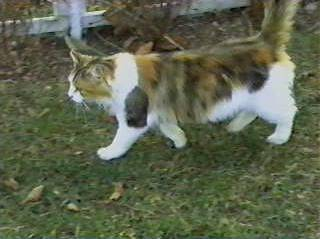

Confundiu cat: /Users/lucaspaim/PycharmProjects/deep_learning_cats_dogs/notebooks/../data/raw/cats_and_dogs_filtered/validation/cats/cat.2150.jpg com dog, proba: [0. 1.]


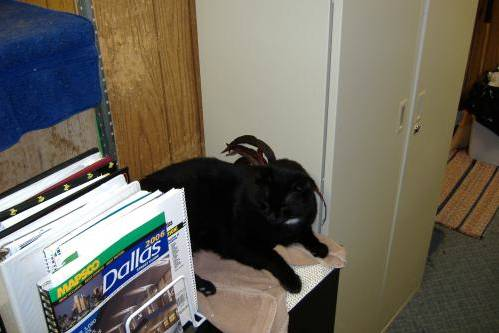

Confundiu cat: /Users/lucaspaim/PycharmProjects/deep_learning_cats_dogs/notebooks/../data/raw/cats_and_dogs_filtered/validation/cats/cat.2029.jpg com dog, proba: [1.94248982e-39 1.00000000e+00]


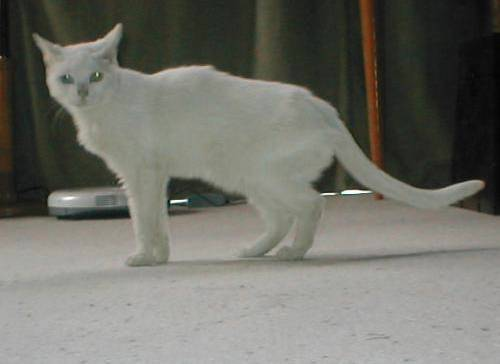

Confundiu cat: /Users/lucaspaim/PycharmProjects/deep_learning_cats_dogs/notebooks/../data/raw/cats_and_dogs_filtered/validation/cats/cat.2176.jpg com dog, proba: [3.35506967e-68 1.00000000e+00]


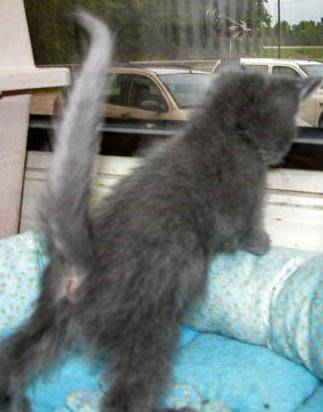

Confundiu cat: /Users/lucaspaim/PycharmProjects/deep_learning_cats_dogs/notebooks/../data/raw/cats_and_dogs_filtered/validation/cats/cat.2162.jpg com dog, proba: [1.13746644e-12 1.00000000e+00]


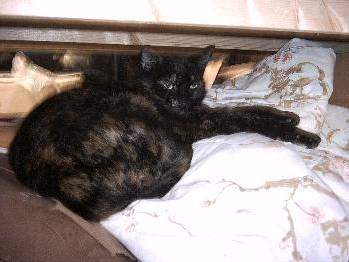

Confundiu cat: /Users/lucaspaim/PycharmProjects/deep_learning_cats_dogs/notebooks/../data/raw/cats_and_dogs_filtered/validation/cats/cat.2211.jpg com dog, proba: [2.09063558e-43 1.00000000e+00]


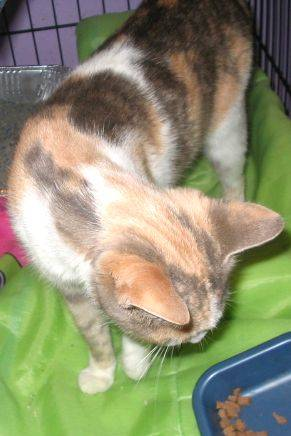

Confundiu cat: /Users/lucaspaim/PycharmProjects/deep_learning_cats_dogs/notebooks/../data/raw/cats_and_dogs_filtered/validation/cats/cat.2415.jpg com dog, proba: [2.92597588e-120 1.00000000e+000]


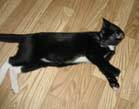

Confundiu cat: /Users/lucaspaim/PycharmProjects/deep_learning_cats_dogs/notebooks/../data/raw/cats_and_dogs_filtered/validation/cats/cat.2366.jpg com dog, proba: [2.30750049e-256 1.00000000e+000]


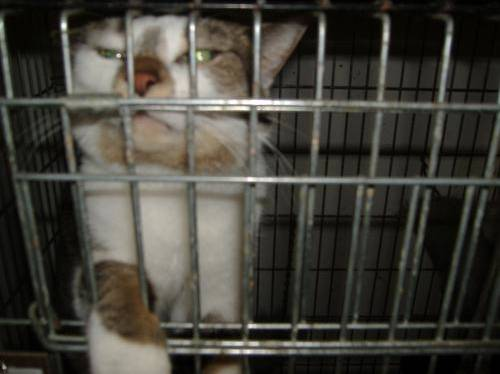

Confundiu cat: /Users/lucaspaim/PycharmProjects/deep_learning_cats_dogs/notebooks/../data/raw/cats_and_dogs_filtered/validation/cats/cat.2263.jpg com dog, proba: [3.95404733e-82 1.00000000e+00]


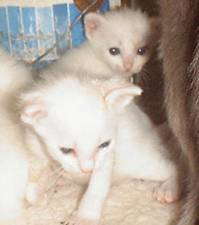

Confundiu cat: /Users/lucaspaim/PycharmProjects/deep_learning_cats_dogs/notebooks/../data/raw/cats_and_dogs_filtered/validation/cats/cat.2476.jpg com dog, proba: [9.98504808e-175 1.00000000e+000]


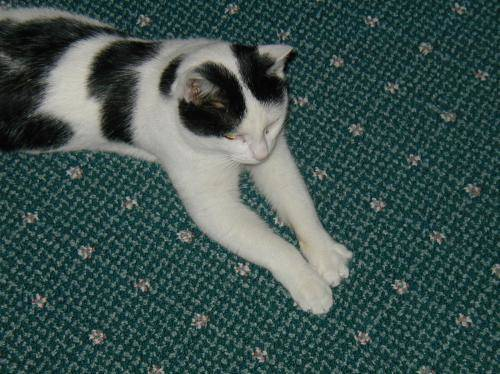

In [67]:
from IPython.display import Image, display

predicated_proba = model.predict_proba(X_val)

# aux for find proba for class
aux = 0
for predicated, expected in zip(predictions, Y_val.iterrows()):
    if expected[1][0] != predicated:
        img_dir = val_X_base[0][expected[0]]
        percent = predicated_proba[aux]
        print(f'Confundiu {expected[1][0]}: {img_dir} com {predicated}, proba: {percent}')
        display(Image(filename=img_dir))
    aux += 1
